## 2. Agregación de datos

In [1]:
import matplotlib.pyplot as plt
import pandas
import seaborn

from datasets import dataset

from utils import display_markdown, summarize_iterable

### Ejercicio 1

Grafiquen la media de la variable pf_identity y hf_score a través de los años.

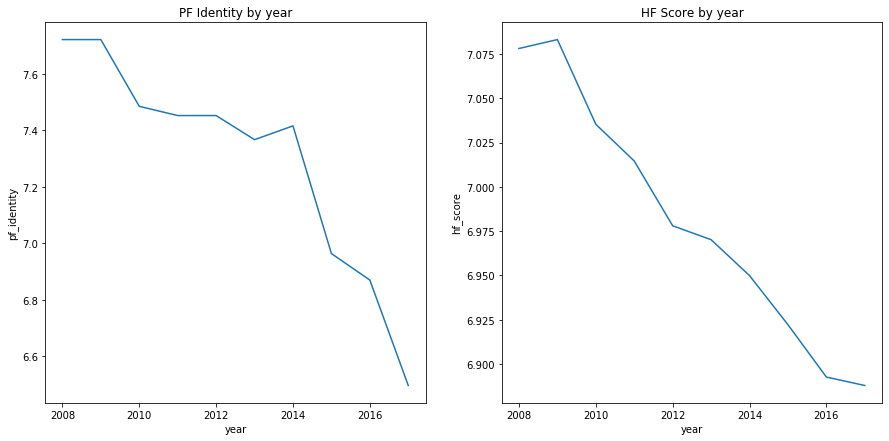

In [19]:
byYearDS = dataset.groupby('year').mean().reset_index();
plt.figure(figsize=(15,7))
plt.subplot(121);
plt.title('PF Identity by year');
seaborn.lineplot(data=byYearDS, x='year', y='pf_identity')
plt.subplot(122);
plt.title('HF Score by year');
seaborn.lineplot(data=byYearDS, x='year', y='hf_score')


### Ejercicio 2
Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?

#### Respuesta
**PF_IDENTITY:** A nivel general, la tendencia con los años baja. Esta misma tendencia se ve tambien en casi todas las regiones por separado, con la excepción de South Asia.
**HF_SCORE:** Tambien aqui se ve una linea que baja cuando NO agrupamos por region. Y es lo mismo que se ve en la mayoria de las regiones meno5 de ellas tienen tendencia inversa o al menos estable. Latinoamerica tiene la tendencia que más baja.
    

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

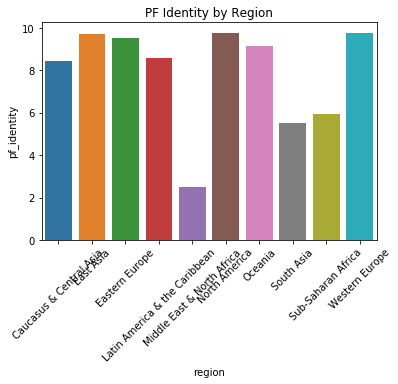

In [23]:
byRegionDS = dataset.groupby(['region']).mean().reset_index();
seaborn.barplot(data=byRegionDS, x='region', y='pf_identity')
plt.title('PF Identity by Region')
plt.xticks(rotation=45)

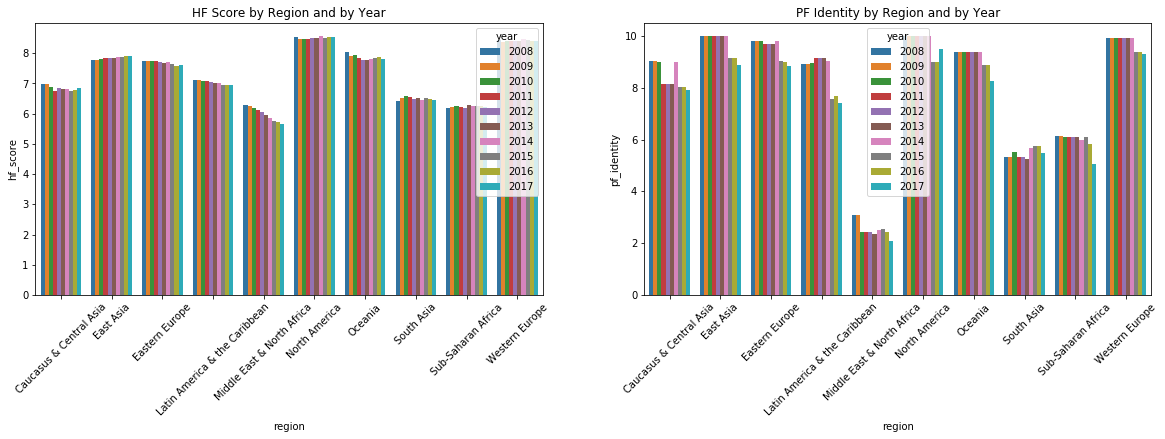

In [55]:
byYearRegionDS = dataset.groupby(['year','region']).mean().reset_index();
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.xticks(rotation=45)
plt.title('HF Score by Region and by Year')
seaborn.barplot(data=byYearRegionDS, x='region', y='hf_score', hue='year')
plt.subplot(1,2,2)
plt.xticks(rotation=45)
plt.title('PF Identity by Region and by Year')
seaborn.barplot(data=byYearRegionDS, x='region', y='pf_identity', hue='year')

### Ejercicio 3
Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable pf_identity en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

#### Respuesta
Los paises que tienen tendencia a decrementar y que claramente tienen una incidencia importante en la pendiente negativa general son: Brasil, Costa Rica, Chile, Dom. Republic, El Salvador, Guatemala, Haiti, Honduras, Jamaica, Nicaragua, Paraguay y Venezuela.

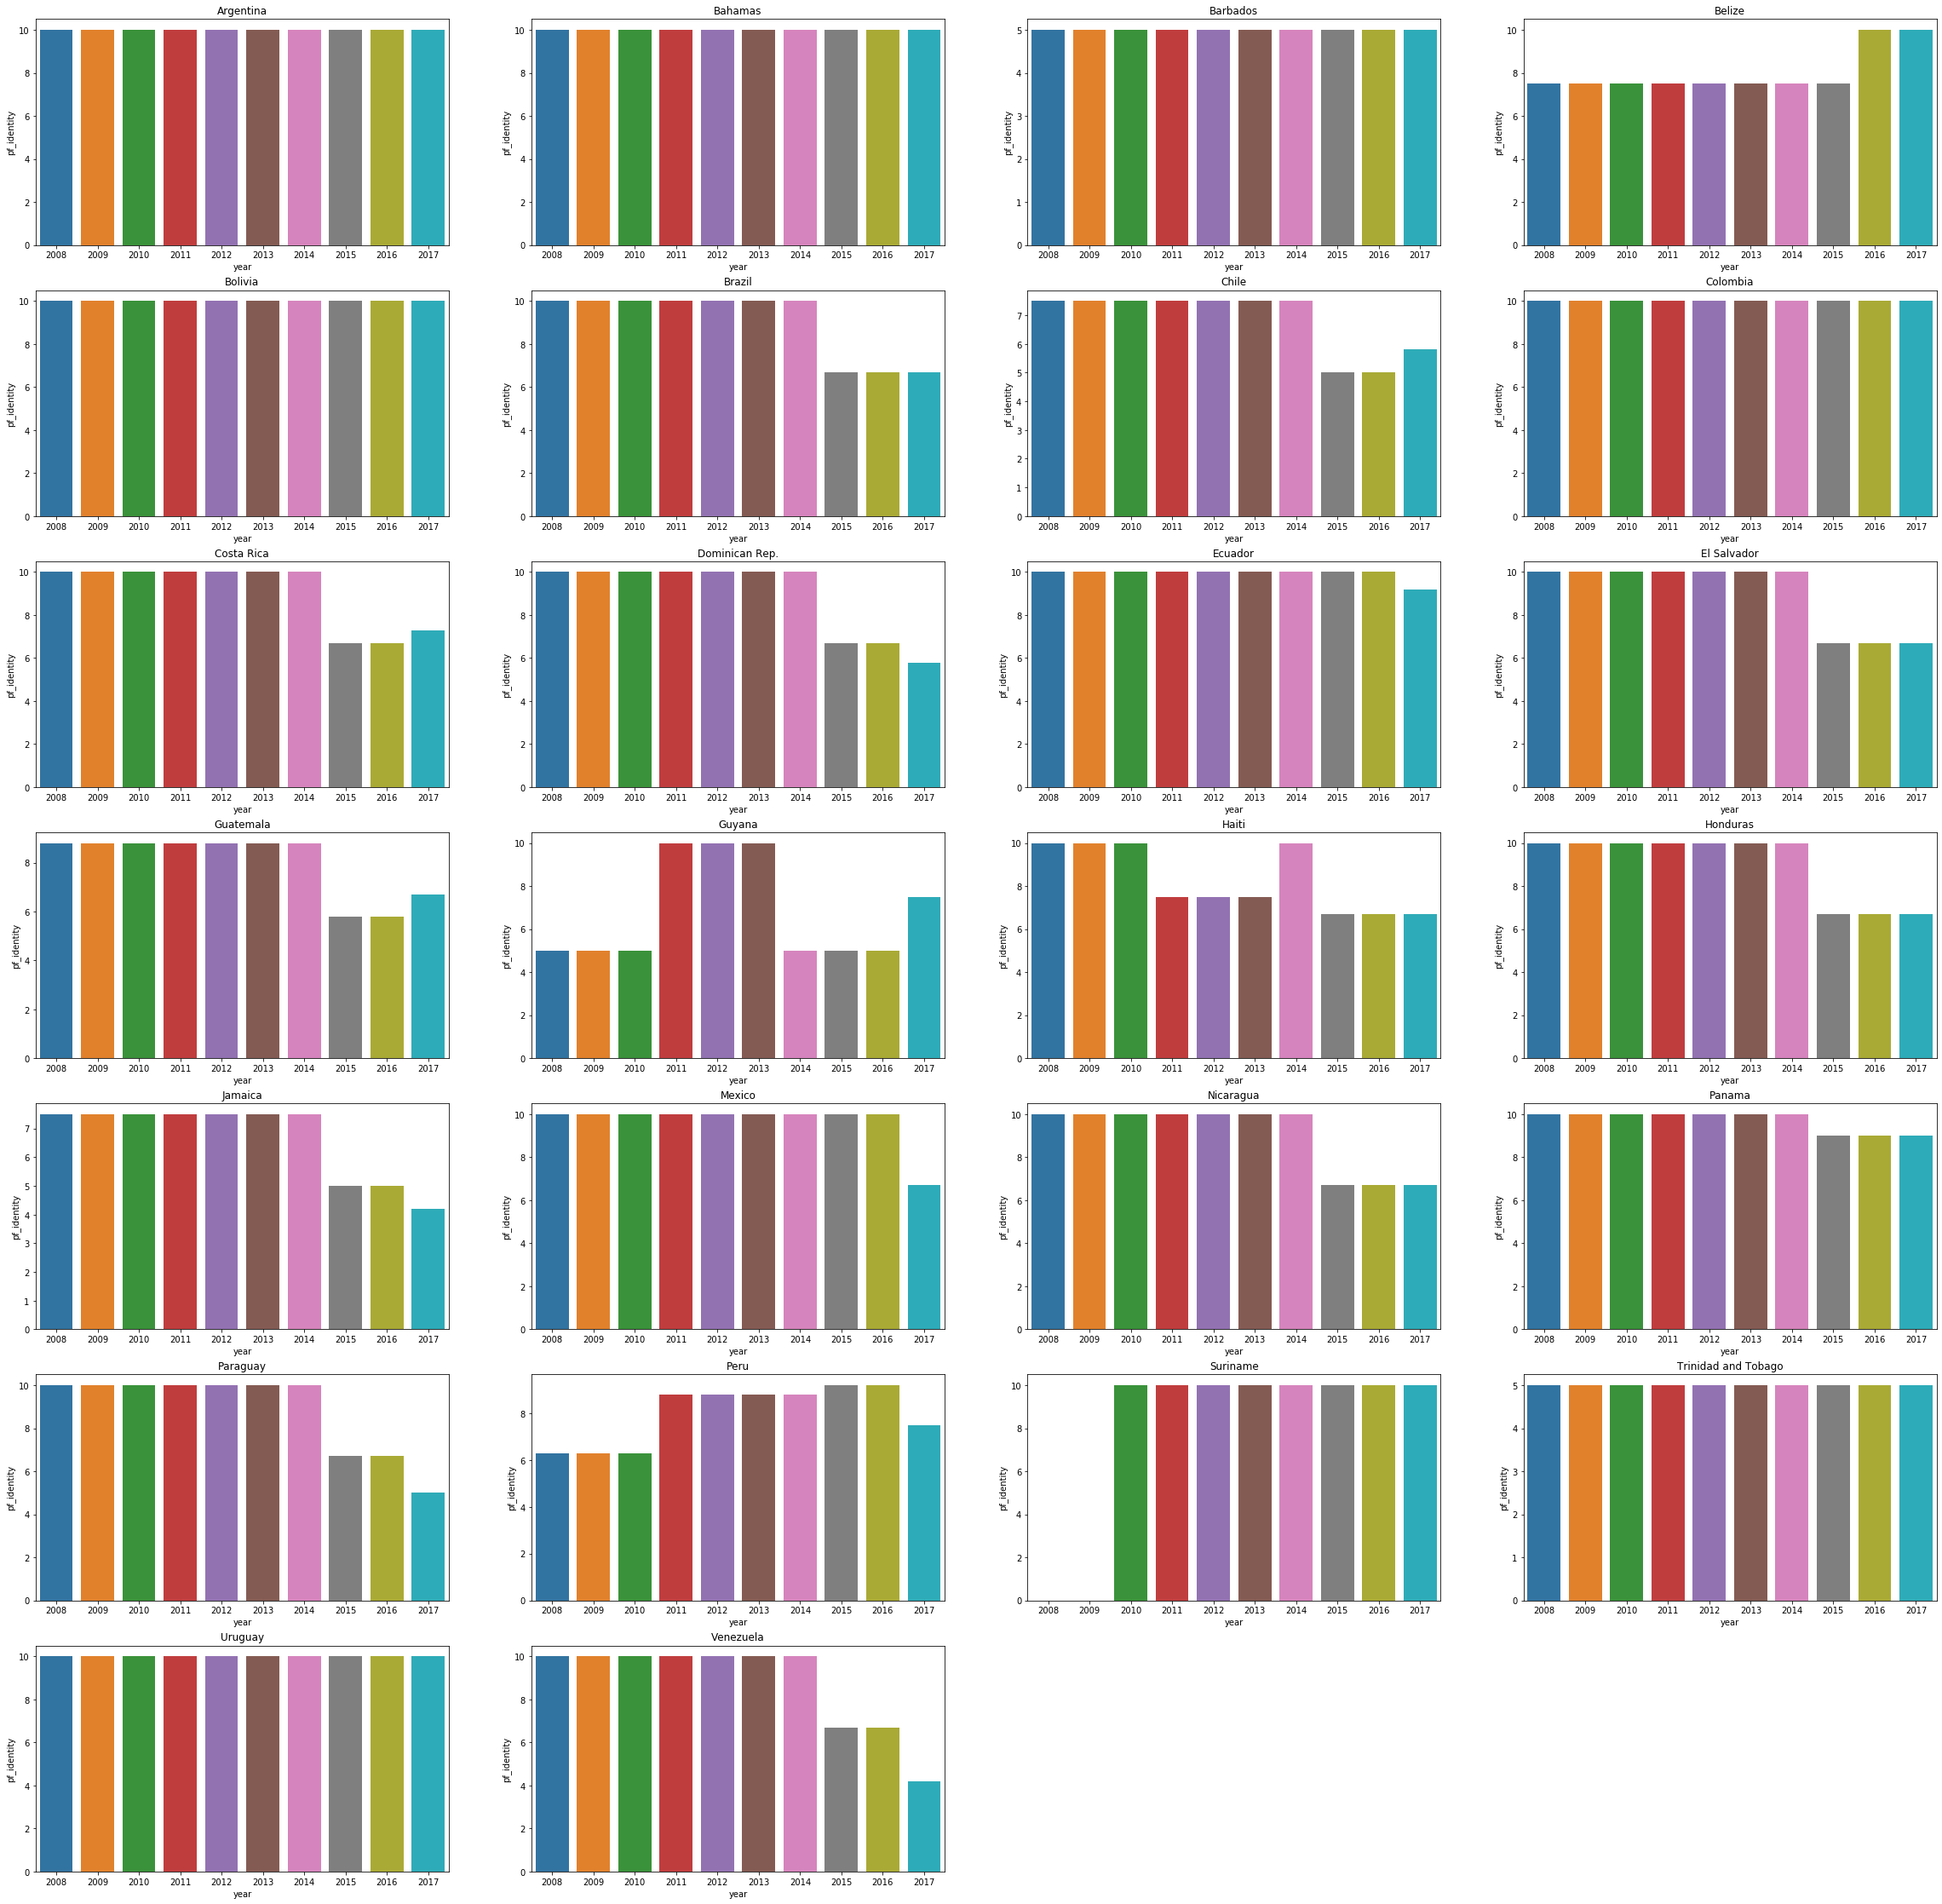

In [37]:
latamCountriesArray = dataset[dataset.region == 'Latin America & the Caribbean'].countries.unique()
plt.rcParams.update({'figure.max_open_warning': 0})
plt.figure(figsize=(40,40))
i=1
for country in latamCountriesArray:
    plt.subplot(7,4,i)
    aCountryByYearDS = dataset[dataset.countries == country].groupby('year').mean().reset_index();
    seaborn.barplot(data=aCountryByYearDS, x='year', y='pf_identity')
    plt.title(country)
    i+=1